<a href="https://colab.research.google.com/github/simranvanjani/projects/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Convolutional Neural Network (CNN)

Today, we will train a simple Convolutional Neural Network (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import cifar10

import matplotlib.pyplot as plt
plt.style.use('dark_background')


**Load the dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and 
#each value in the channel can range from 0 to 255. 
#Hence to normalize in 0-->1 range, we need to divide it by 255

train_images, test_images = train_images / 255.0, test_images / 255.0
 

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images.shape[0]


50000

In [ ]:
test_images.shape[0]

10000

In [ ]:
test_labels[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


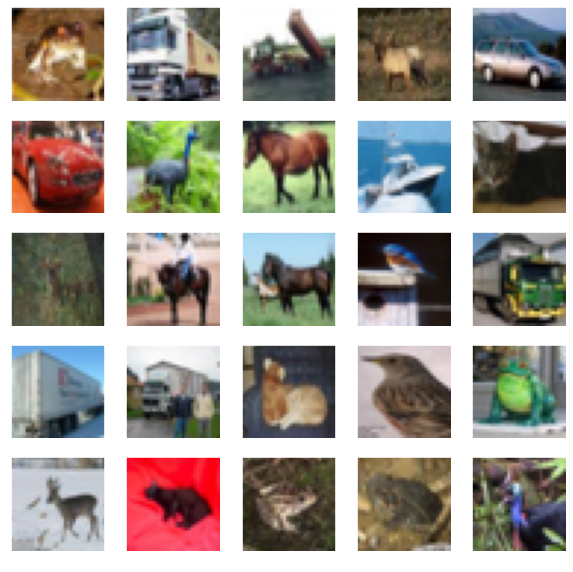

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    y[index]
    plt.xlabel(class_names[y[index]])

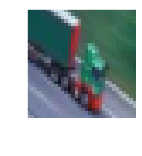

In [ ]:
plot_sample(train_images, train_labels, 50)

In [ ]:
   train_labels[50]

9

# **Build simple artificial neural network for image classification**

In [ ]:
ann = models.Sequential()
ann.add(layers.Flatten(input_shape=(32,32,3))),
ann.add(layers.Dense(3000, activation='relu')),
ann.add(layers.Dense(1000, activation='relu')),
ann.add(layers.Dense(10, activation='softmax'))    
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.8079 - accuracy: 0.3560
Epoch 2/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.6200 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5398 - accuracy: 0.4573
Epoch 4/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4825 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4315 - accuracy: 0.4962


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
pred_labels = ann.predict(test_images)
y_pred_classes = [np.argmax(element) for element in pred_labels]

[[659  24  27  21  24  33  21  61  66  64]
 [ 61 547   1  18  11  32  14  67  31 218]
 [124  23 249  79 143 133 101 112  15  21]
 [ 54  10  48 266  42 311 107  90  15  57]
 [ 80  12  96  33 388 103 115 144  14  15]
 [ 31   7  57 146  70 466  65 111  20  27]
 [ 16   8  46  65 124 103 557  53   8  20]
 [ 36  12  30  44  61  87  21 651   3  55]
 [228  61   5  15  18  43  12  33 488  97]
 [ 44 133   4  28  15  38  25  66  22 625]]


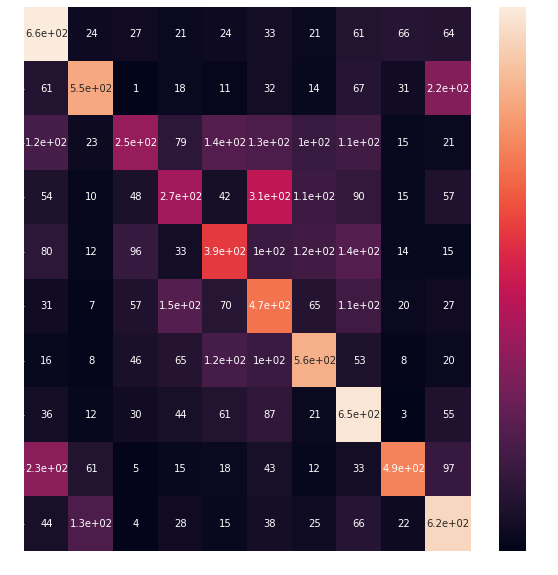

In [ ]:
cf_matrix = confusion_matrix(test_labels, y_pred_classes)
print(cf_matrix)
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True)

In [ ]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape =(32,32,3)))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512,activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(64,activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(10,activation = 'softmax'))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [ ]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 100s 63ms/step - loss: 1.5738 - accuracy: 0.4211
Epoch 2/10
1563/1563 [==============================] - 99s 64ms/step - loss: 1.2109 - accuracy: 0.5712
Epoch 3/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.0578 - accuracy: 0.6280
Epoch 4/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.9656 - accuracy: 0.6643
Epoch 5/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8919 - accuracy: 0.6907
Epoch 6/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8425 - accuracy: 0.7062
Epoch 7/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8000 - accuracy: 0.7238
Epoch 8/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7675 - accuracy: 0.7358
Epoch 9/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7377 - accuracy: 0.7454
Epoch 10/10
1563/1563 [==============================] - 10

In [ ]:
cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 15ms/step - loss: 0.8071 - accuracy: 0.7227


[0.8070904016494751, 0.7226999998092651]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
pred_labels = cnn_model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in pred_labels]

[[684  10  23  29  35   4  10   7 168  30]
 [ 18 810   6  16   6   3   6   2  39  94]
 [ 61   5 501 110 162  38  59  33  24   7]
 [ 14   2  25 674  93  75  51  31  21  14]
 [ 10   4  22  62 813   6  25  42  14   2]
 [  3   2  31 282  81 509  19  57   9   7]
 [  2   3  22  83  58  14 799   7   8   4]
 [ 17   6  13  77  78  33   7 745   6  18]
 [ 25  15   5  24  11   1   6   3 889  21]
 [ 15  46   4  32  14   5  15  10  56 803]]


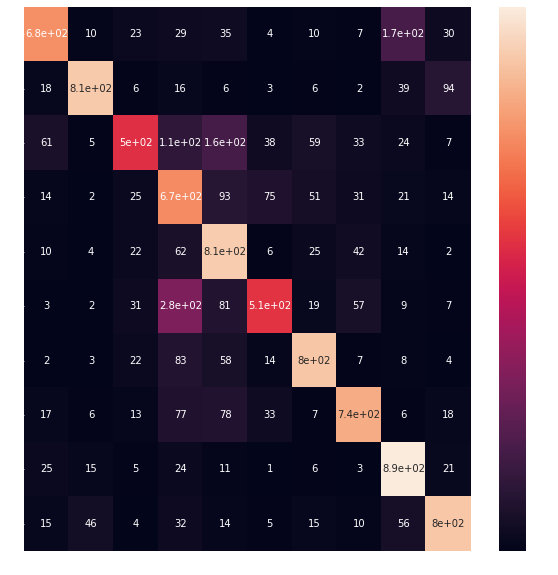

In [ ]:
cf_matrix = confusion_matrix(test_labels, y_pred_classes)
print(cf_matrix)
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print("Classification Report:\n", classification_report(test_labels, y_pred_classes ))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74      1000
           1       0.90      0.81      0.85      1000
           2       0.77      0.50      0.61      1000
           3       0.49      0.67      0.56      1000
           4       0.60      0.81      0.69      1000
           5       0.74      0.51      0.60      1000
           6       0.80      0.80      0.80      1000
           7       0.80      0.74      0.77      1000
           8       0.72      0.89      0.80      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.72     10000
weighted avg       0.74      0.72      0.72     10000

